In [1]:
%cat 0Source_Citation.txt

Source and citation

- This notebook is a part of the `pytheos` package.
- Website: http://github.com/SHDShim/pytheos.
- How to cite: S.-H. Shim (2017) Pytheos - a python tool set for equations of state. DOI: 10.5281/zenodo.802392


In [2]:
%matplotlib inline 
# %matplotlib notebook # for interactive

For high dpi displays.

In [3]:
%config InlineBackend.figure_format = 'retina'

# 0. General note

- This notebook shows an example of how to conduct equation of state fitting for the pressure-volume-temperature data using `pytheos`.

- Advantage of using `pytheos` is that you can apply different pressure scales and different equations without much coding.  

- We use data on SiC from [Nisr et al. (2017, JGR-Planet)]().

# 1. Global setup

In [4]:
import numpy as np
import uncertainties as uct
import pandas as pd
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt
import pytheos as eos

# 2. Setups for fitting with two different gold pressure scales

Equations of state of gold from Fei et al. (2007, PNAS) and Dorogokupets and Dewaele (2007, HPR).  These equations are provided from `pytheos` as built-in classes.

In [5]:
au_eos = {'Fei2007': eos.gold.Fei2007bm3(), 'Dorogokupets2007': eos.gold.Dorogokupets2007()}

/opt/homebrew/Caskroom/miniforge/base/envs/pytheos-dev/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


Because we use Birch-Murnaghan eos version of Fei2007 and Dorogokupets2007 used Vinet eos, we create a dictionary to provide different static compression eos for the different pressure scales used.

In [6]:
st_model = {'Fei2007': eos.BM3Model, 'Dorogokupets2007': eos.VinetModel}

In [7]:
k0_3c = {'Fei2007': 241.2, 'Dorogokupets2007': 243.0}
k0p_3c = {'Fei2007': 2.84, 'Dorogokupets2007': 2.68}
k0_6h = {'Fei2007': 243.1, 'Dorogokupets2007': 245.5}
k0p_6h = {'Fei2007': 2.79, 'Dorogokupets2007': 2.59}

Initial guess:

In [8]:
gamma0 = 1.06
q = 1.
theta0 = 1200.

Physical constants for different materials

In [9]:
v0 = {'3C': 82.8042, '6H': 124.27}
n_3c = 2.; z_3c = 4.
n_6h = 2.; z_6h = 6.

# 3. Setup data (3C)

Data file is in `csv` format.

In [10]:
data = pd.read_csv('./data/3C-HiTEOS-final.csv')

In [11]:
data.head()

,V(Au),sV(Au),V(3C),sV(3C),T(3C),sT(3C)
0,59.481877,0.080243,73.1264,0.0366,1725.0,42.426407
1,59.425646,0.053745,73.0702,0.0443,1703.0,43.133514
2,59.434845,0.026847,73.0259,0.0442,1846.0,47.376154
3,59.405714,0.050305,72.9729,0.0365,1821.0,43.840620
4,59.399059,0.046041,72.9829,0.0365,1862.0,41.012193


In [12]:
data.columns

Index(['V(Au)', 'sV(Au)', 'V(3C)', 'sV(3C)', 'T(3C)', 'sT(3C)'], dtype='object')

In [13]:
v_std = unp.uarray( data['V(Au)'], data['sV(Au)'])
temp = unp.uarray(data['T(3C)'], data['sT(3C)'])
v = unp.uarray(data['V(3C)'], data['sV(3C)'])

`pytheos` provides `plot.thermal_data` function to show the data distribution in the P-V and P-T spaces.

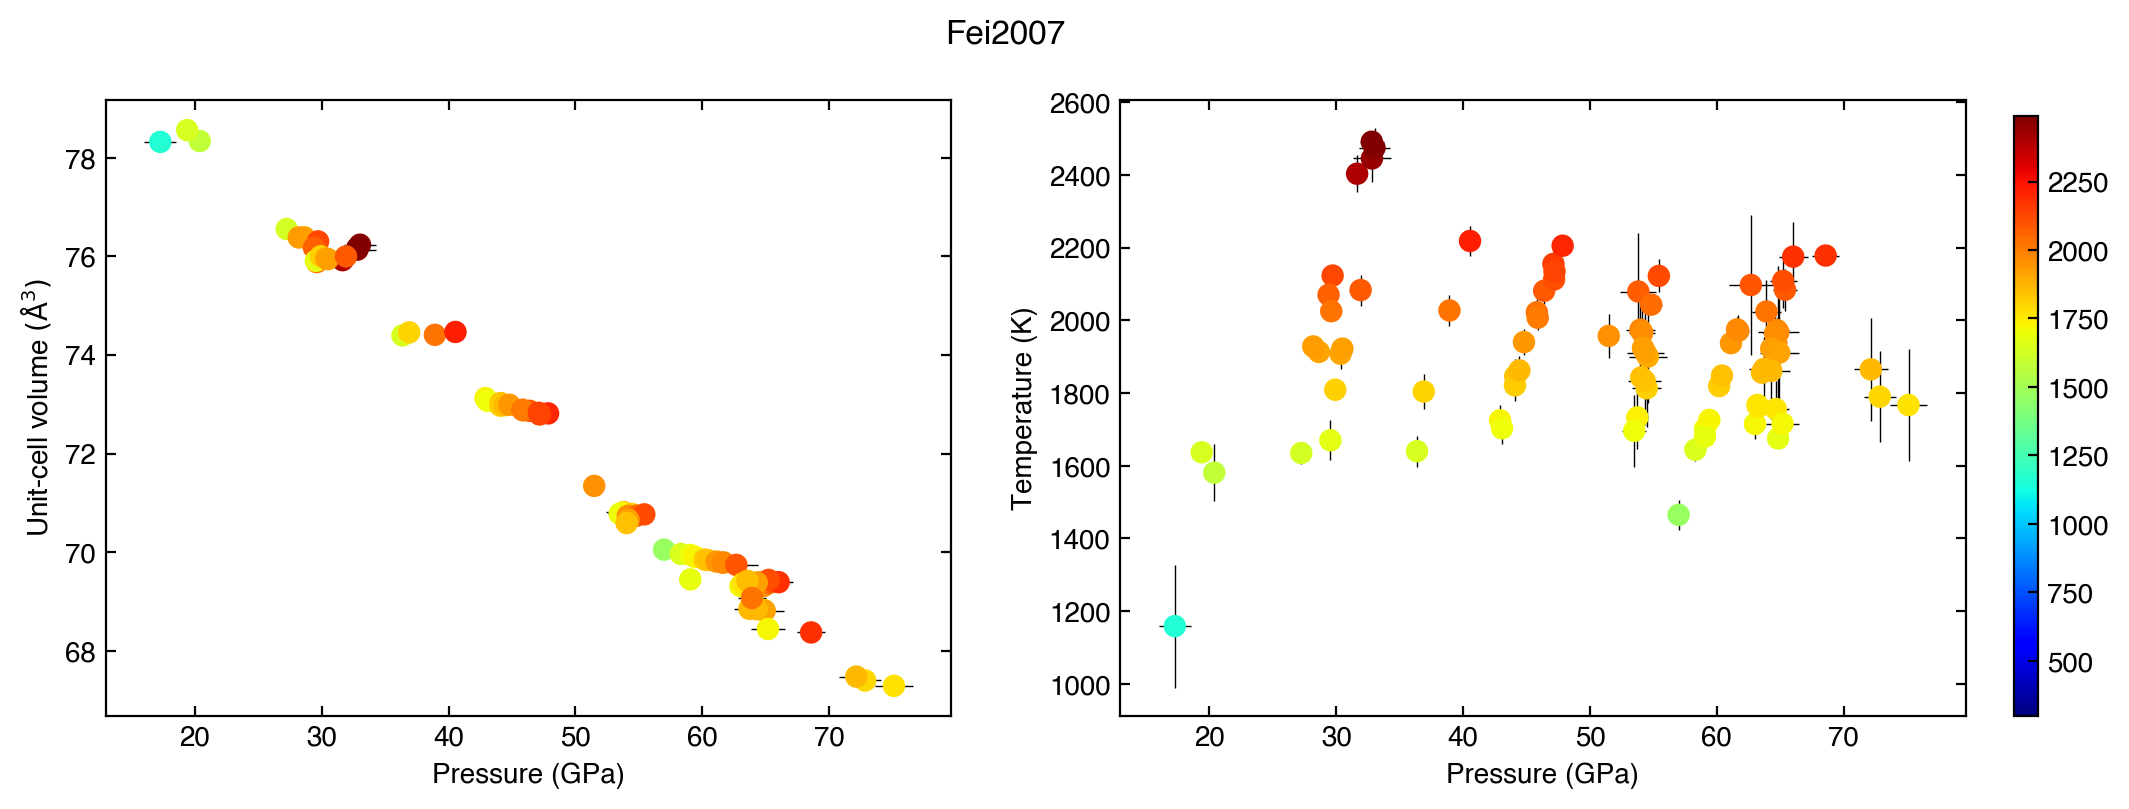

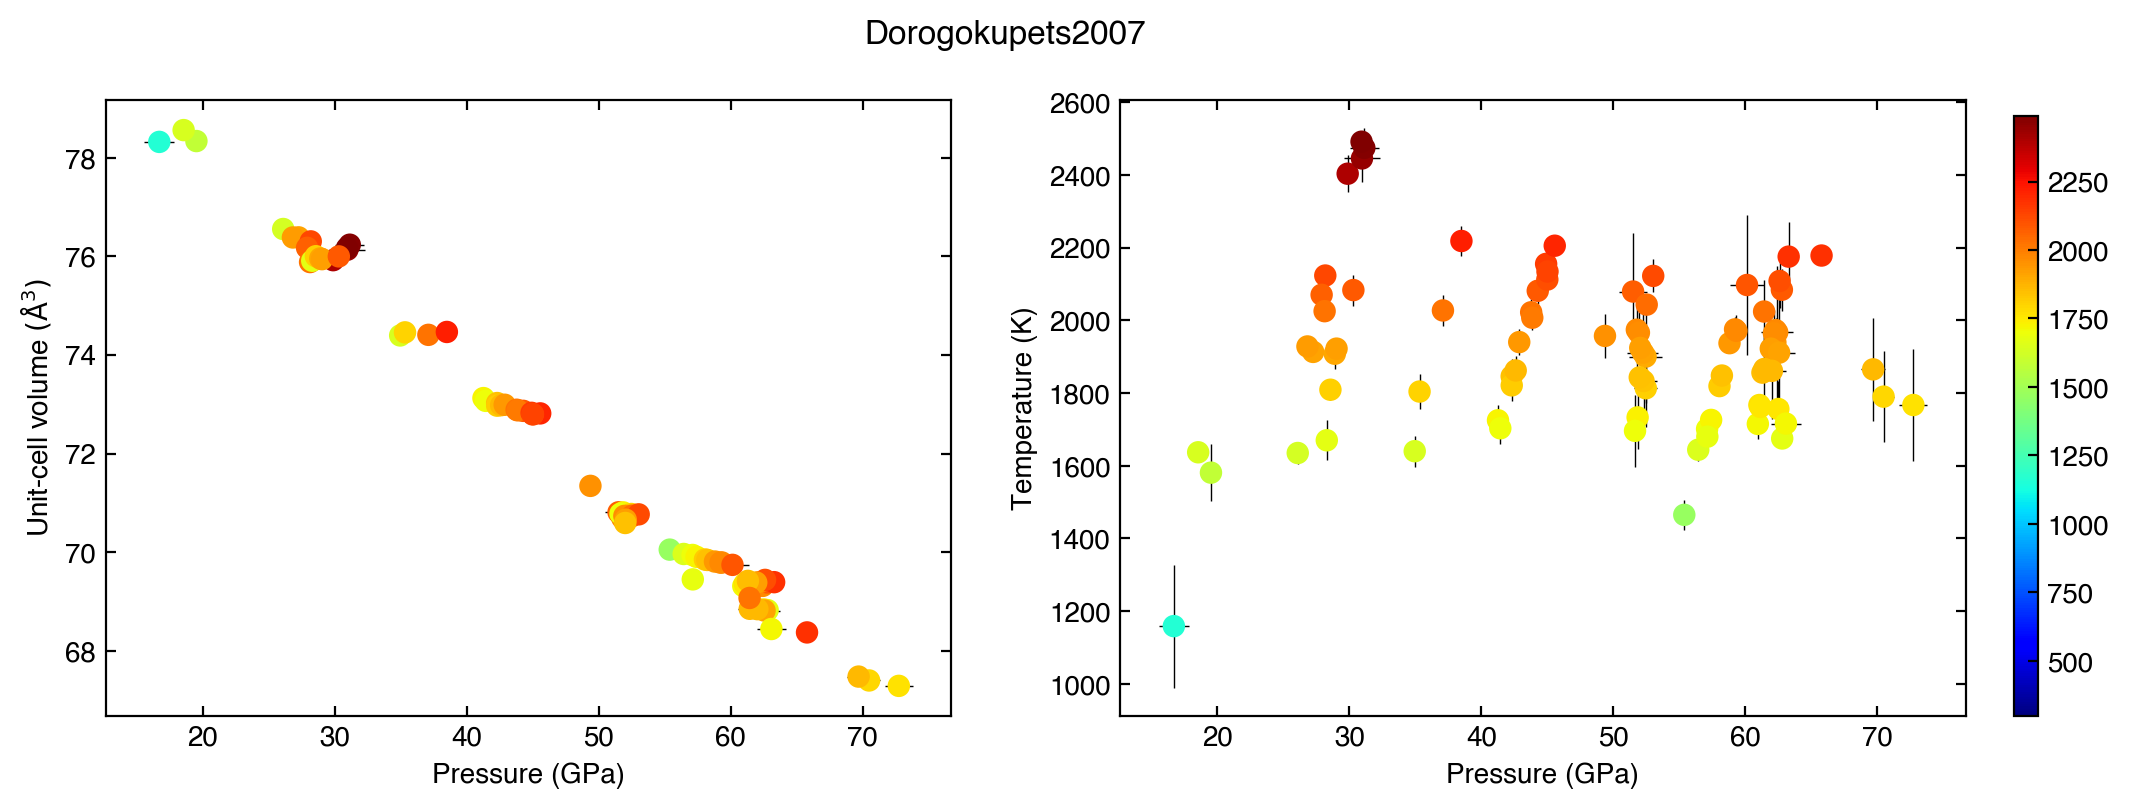

In [14]:
for key, value in au_eos.items(): # iterations for different pressure scales
    p = au_eos[key].cal_p(v_std, temp)
    eos.plot.thermal_data({'p': p, 'v': v, 'temp': temp}, title=key)

# 4. Data fitting with constq equation (3C)

The cell below shows fitting using constant q assumptions for the thermal part of eos.

Normally weight for each data point can be calculated from $\sigma(P)$.  In this case, using `uncertainties`, we can easily propagate the temperature and volume uncertainties to get the value.

********Fei2007
[[Model]]
    (Model(bm3_p, prefix='st_') + Model(constq_pth, prefix='th_', n='2.0', z='4.0'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 83
    # variables        = 1
    chi-square         = 148.857707
    reduced chi-square = 1.81533789
    Akaike info crit   = 50.4844711
    Bayesian info crit = 52.9033117
    R-squared          = 0.99422678
[[Variables]]
    st_v0:      82.8042 (fixed)
    st_k0:      241.2 (fixed)
    st_k0p:     2.84 (fixed)
    th_v0:      82.8042 (fixed)
    th_gamma0:  1.06 (fixed)
    th_q:      -1.29863946 +/- 0.10045203 (7.74%) (init = 1)
    th_theta0:  1200 (fixed)
********Dorogokupets2007
[[Model]]
    (Model(vinet_p, prefix='st_') + Model(constq_pth, prefix='th_', n='2.0', z='4.0'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 83
    # variables        = 1
    chi-square         = 632.780675
    reduced chi-square = 7.

/opt/homebrew/Caskroom/miniforge/base/envs/pytheos-dev/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/Users/danshim/ASU Dropbox/Sang-Heon Shim/Python/pytheos-2026/pytheos/plot/thermal_fit.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniforge/base/envs/pytheos-dev/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/Users/danshim/ASU Dropbox/Sang-Heon Shim/Python/pytheos-2026/pytheos/plot/thermal_fit.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


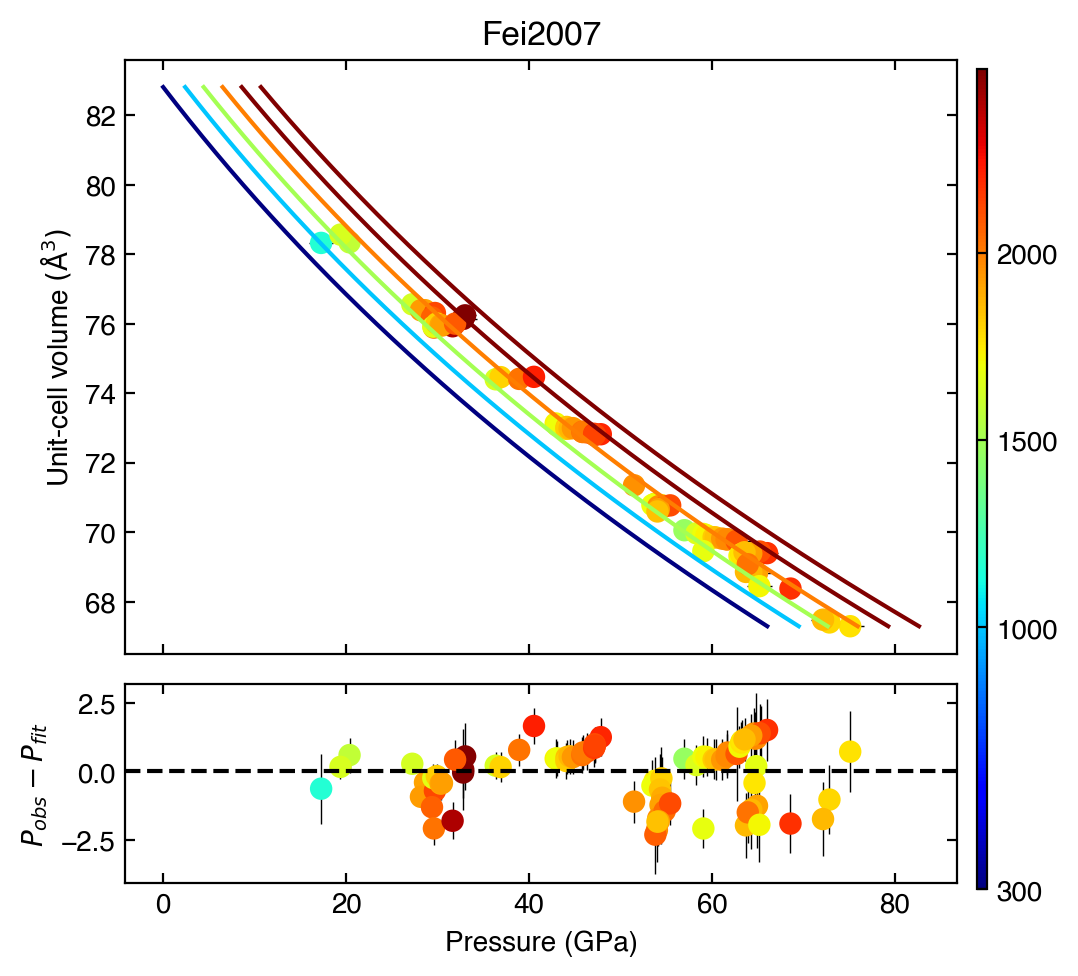

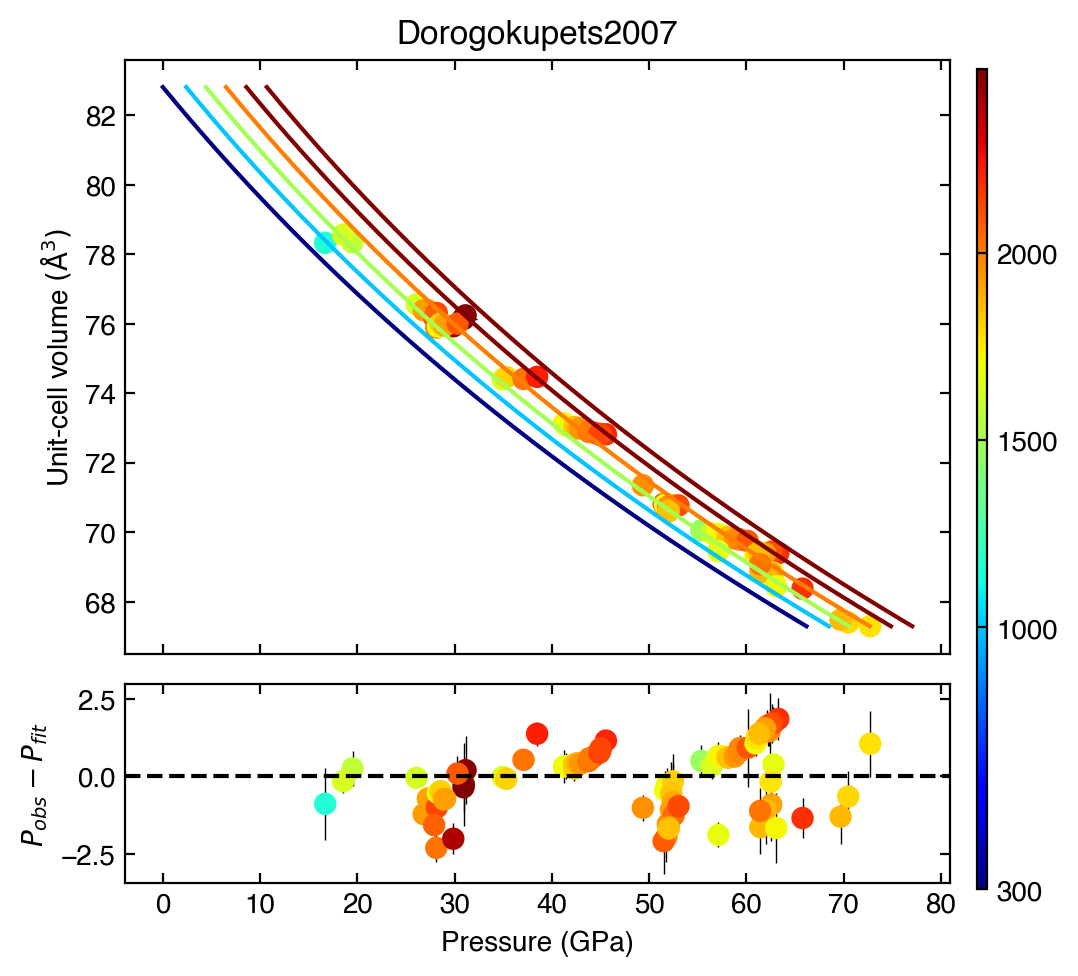

In [15]:
for key, value in au_eos.items(): # iteration for different pressure scales
    # calculate pressure
    p = au_eos[key].cal_p(v_std, temp)
    # add prefix to the parameters.  
    # this is important to distinguish thermal and static parameters
    eos_st = st_model[key](prefix='st_') 
    eos_th = eos.ConstqModel(n_3c, z_3c, prefix='th_')
    # define initial values for parameters
    params = eos_st.make_params(v0=v0['3C'], k0=k0_3c[key], k0p=k0p_3c[key])
    params += eos_th.make_params(v0=v0['3C'], gamma0=gamma0, q=q, theta0=theta0)
    # construct PVT eos
    # here we take advantage of lmfit to combine any formula of static and thermal eos's
    pvteos = eos_st + eos_th
    # fix static parameters and some other well known parameters
    params['th_v0'].vary=False; params['th_gamma0'].vary=False; params['th_theta0'].vary=False
    params['st_v0'].vary=False; params['st_k0'].vary=False; params['st_k0p'].vary=False
    # calculate weights.  setting it None results in unweighted fitting
    weights = 1./unp.std_devs(p) #None
    fit_result = pvteos.fit(unp.nominal_values(p), params, v=unp.nominal_values(v), 
                                   temp=unp.nominal_values(temp), weights=weights)
    print('********'+key)
    print(fit_result.fit_report())
    # plot fitting results
    eos.plot.thermal_fit_result(fit_result, p_err=unp.std_devs(p), v_err=unp.std_devs(v), title=key)

The warning message above is because the static EOS does not need temperature.  `lmfit` generates warning if an assigned independent variable is not used in fitting for any components.

# 5. Data fitting with Dorogokupets2007 equation (3C)

The cell below shows fitting using Altschuler equation for the thermal part of eos.

In [16]:
gamma_inf = 0.4
beta = 1.

********Fei2007
[[Model]]
    (Model(bm3_p, prefix='st_') + Model(dorogokupets2007_pth, prefix='th_', n='2.0', z='4.0'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 83
    # variables        = 2
    chi-square         = 96.8389530
    reduced chi-square = 1.19554263
    Akaike info crit   = 16.7993231
    Bayesian info crit = 21.6370043
    R-squared          = 0.99427637
[[Variables]]
    st_v0:         82.8042 (fixed)
    st_k0:         241.2 (fixed)
    st_k0p:        2.84 (fixed)
    th_v0:         82.8042 (fixed)
    th_gamma0:     1.06 (fixed)
    th_gamma_inf:  2.48382640 +/- 6.89892616 (277.75%) (init = 0.4)
    th_beta:       1.10849816 +/- 5.88169000 (530.60%) (init = 1)
    th_theta0:     1200 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(th_gamma_inf, th_beta) = -0.9998
********Dorogokupets2007
[[Model]]
    (Model(vinet_p, prefix='st_') + Model(dorogokupets2007_pth, prefix='th_', n='2.0', z

/opt/homebrew/Caskroom/miniforge/base/envs/pytheos-dev/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/Users/danshim/ASU Dropbox/Sang-Heon Shim/Python/pytheos-2026/pytheos/plot/thermal_fit.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniforge/base/envs/pytheos-dev/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/Users/danshim/ASU Dropbox/Sang-Heon Shim/Python/pytheos-2026/pytheos/plot/thermal_fit.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


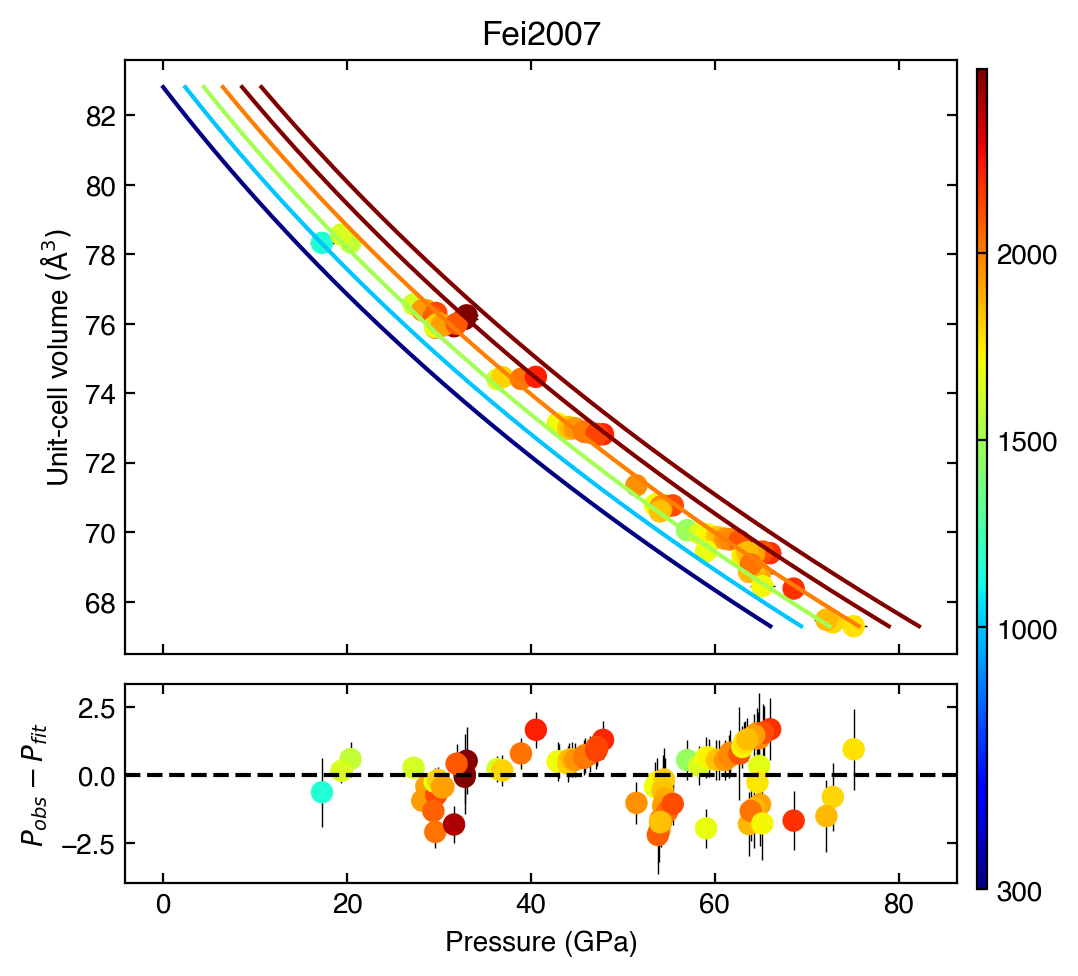

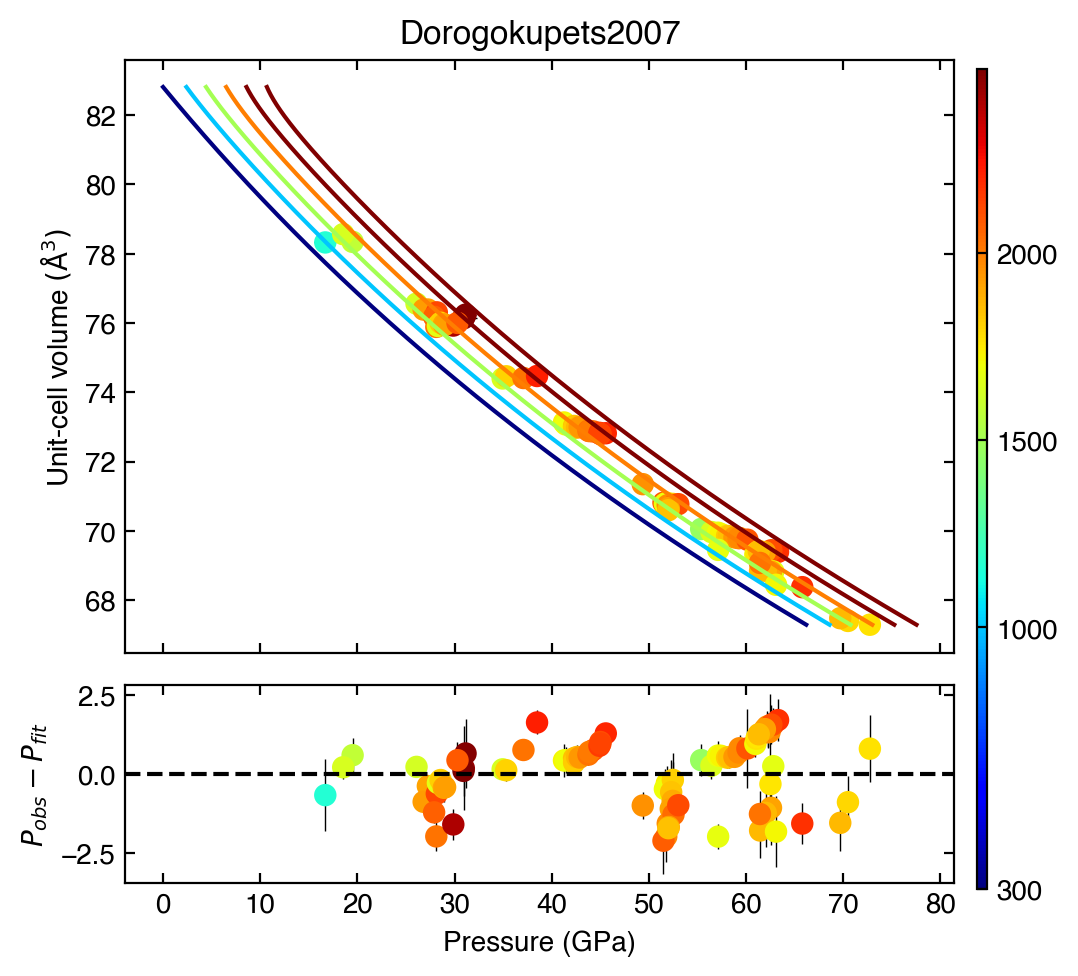

In [17]:
for key, value in au_eos.items():
    # calculate pressure
    p = au_eos[key].cal_p(v_std, temp)
    # add prefix to the parameters.  this is important to distinguish thermal and static parameters
    eos_st = st_model[key](prefix='st_') 
    eos_th = eos.Dorogokupets2007Model(n_3c, z_3c, prefix='th_')
    # define initial values for parameters
    params = eos_st.make_params(v0=v0['3C'], k0=k0_3c[key], k0p=k0p_3c[key])
    params += eos_th.make_params(v0=v0['3C'], gamma0=gamma0, gamma_inf=gamma_inf, beta=beta, theta0=theta0)
    # construct PVT eos
    pvteos = eos_st + eos_th
    # fix static parameters and some other well known parameters
    params['th_v0'].vary=False; params['th_theta0'].vary=False; params['th_gamma0'].vary=False; 
    params['st_v0'].vary=False; params['st_k0'].vary=False; params['st_k0p'].vary=False
    # calculate weights.  setting it None results in unweighted fitting
    weights = None #1./unp.std_devs(p) #None
    fit_result = pvteos.fit(unp.nominal_values(p), params, v=unp.nominal_values(v), 
                                   temp=unp.nominal_values(temp))#, weights=weights)
    print('********'+key)
    print(fit_result.fit_report())
    # plot fitting results
    eos.plot.thermal_fit_result(fit_result, p_err=unp.std_devs(p), v_err=unp.std_devs(v), title=key)

# 6. Data fitting with Speziale equation (3C)

Speziale et al. (2000) presented a different way to describe the behavior of the Gruniense parameter.

In [18]:
q0 = 1.
q1 = 1.

********Fei2007
[[Model]]
    (Model(bm3_p, prefix='st_') + Model(speziale_pth, prefix='th_', n='2.0', z='4.0'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 83
    # variables        = 2
    chi-square         = 96.8196349
    reduced chi-square = 1.19530413
    Akaike info crit   = 16.7827641
    Bayesian info crit = 21.6204453
    R-squared          = 0.99427751
[[Variables]]
    st_v0:      82.8042 (fixed)
    st_k0:      241.2 (fixed)
    st_k0p:     2.84 (fixed)
    th_v0:      82.8042 (fixed)
    th_gamma0:  1.06 (fixed)
    th_q0:     -1.48488611 +/- 0.66409378 (44.72%) (init = 1)
    th_q1:      2.38117428 +/- 5.80839872 (243.93%) (init = 1)
    th_theta0:  1200 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(th_q0, th_q1) = -0.9836
********Dorogokupets2007
[[Model]]
    (Model(vinet_p, prefix='st_') + Model(speziale_pth, prefix='th_', n='2.0', z='4.0'))
[[Fit Statistics]]
    # fitting method   =

/opt/homebrew/Caskroom/miniforge/base/envs/pytheos-dev/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/Users/danshim/ASU Dropbox/Sang-Heon Shim/Python/pytheos-2026/pytheos/plot/thermal_fit.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniforge/base/envs/pytheos-dev/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/Users/danshim/ASU Dropbox/Sang-Heon Shim/Python/pytheos-2026/pytheos/plot/thermal_fit.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


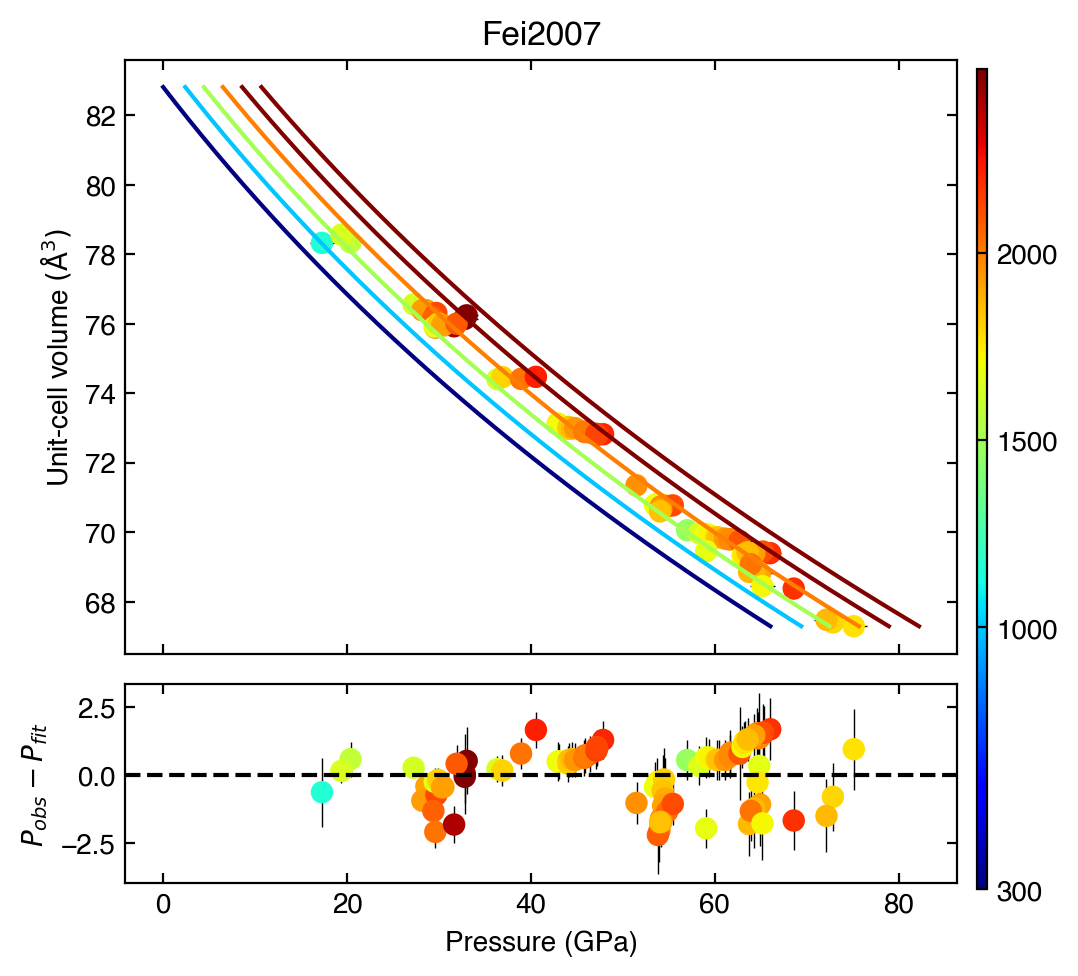

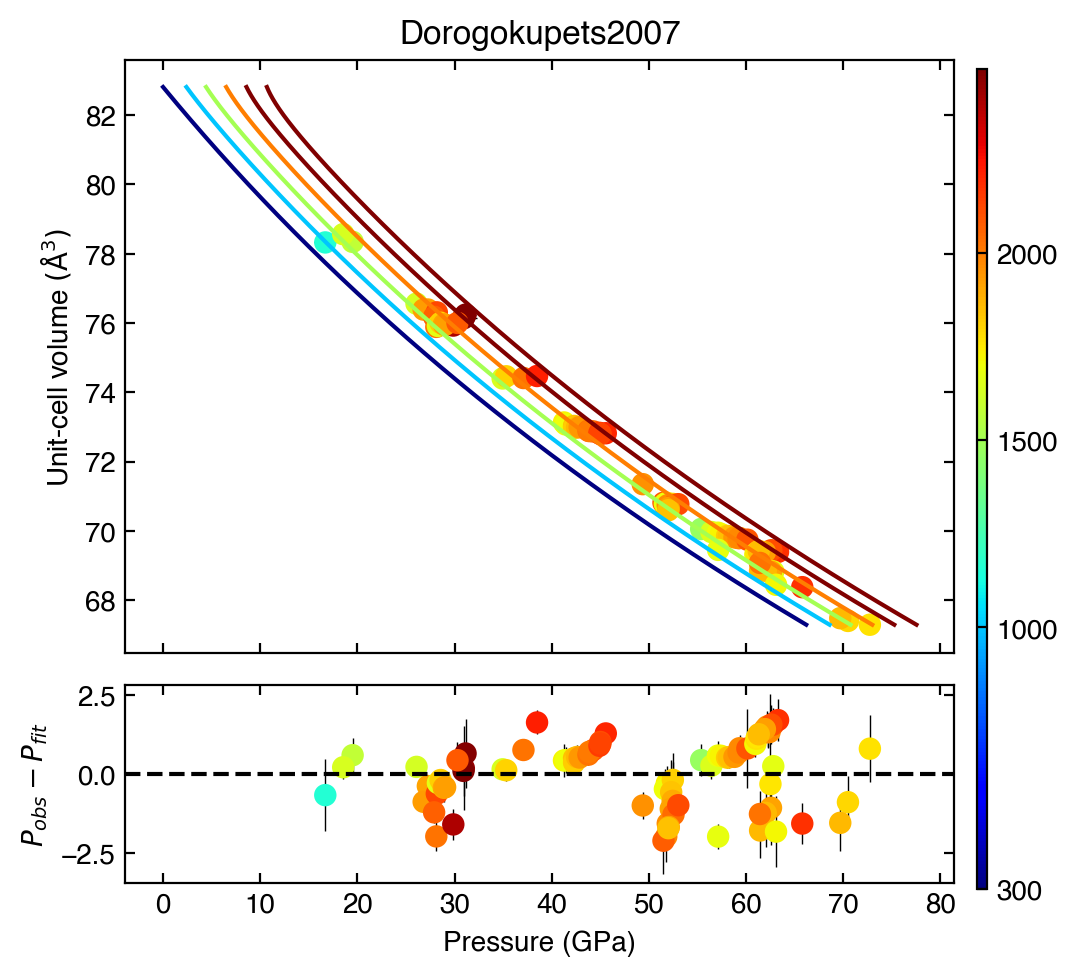

In [19]:
for key, value in au_eos.items():
    # calculate pressure
    p = au_eos[key].cal_p(v_std, temp)
    # add prefix to the parameters.  this is important to distinguish thermal and static parameters
    eos_st = st_model[key](prefix='st_') 
    eos_th = eos.SpezialeModel(n_3c, z_3c, prefix='th_')
    # define initial values for parameters
    params = eos_st.make_params(v0=v0['3C'], k0=k0_3c[key], k0p=k0p_3c[key])
    params += eos_th.make_params(v0=v0['3C'], gamma0=gamma0, q0=q0, q1=q1, theta0=theta0)
    # construct PVT eos
    pvteos = eos_st + eos_th
    # fix static parameters and some other well known parameters
    params['th_v0'].vary=False; params['th_theta0'].vary=False; params['th_gamma0'].vary=False; 
    params['st_v0'].vary=False; params['st_k0'].vary=False; params['st_k0p'].vary=False
    # calculate weights.  setting it None results in unweighted fitting
    weights = None #1./unp.std_devs(p) #None
    fit_result = pvteos.fit(unp.nominal_values(p), params, v=unp.nominal_values(v), 
                                   temp=unp.nominal_values(temp))#, weights=weights)
    print('********'+key)
    print(fit_result.fit_report())
    # plot fitting results
    eos.plot.thermal_fit_result(fit_result, p_err=unp.std_devs(p), v_err=unp.std_devs(v), title=key)